In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('new.csv')
re=np.array(df['umbrella_limit'])
mean=np.mean(re)
std1=np.std(re)

#print(len(re))
#print(mean)
#print(std1)
j=0

for i in re:
    re[j]=(re[j]-mean)/std1
    j=j+1
#print(len(re))

li=list(re)
#print(len(li))
h=0
while(h<985):
    #print(h)
    if (li[h]==3 or li[h]==4):
        li.pop(h)
    h=h+1

#print(li)
#print(len(li))

#df=pd.DataFrame(li)
#df.plot.box(grid='True')

pr_dm=df['property_damage']
po_re=df['police_report_available']

for i in range(len(pr_dm)):
    if (pr_dm[i]=='?'):
        pr_dm[i]=0.5
    elif pr_dm[i]=='YES':
        pr_dm[i]=1
    elif pr_dm[i]=='NO':
        pr_dm[i]=0

for i in range(len(po_re)):
    if (po_re[i]=='?'):
        po_re[i]=0.5
    elif po_re[i]=='YES':
        po_re[i]=1
    elif po_re[i]=='NO':
        po_re[i]=0


C:\Users\Sakshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Sakshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Sakshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Sakshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A val

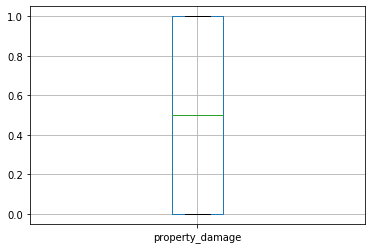

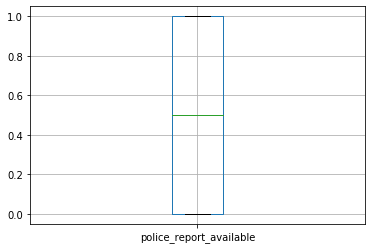

In [2]:
pr_df=pd.DataFrame(pr_dm)
pr_df.plot.box(grid=True)
po_df=pd.DataFrame(po_re)
po_df.plot.box(grid=True)


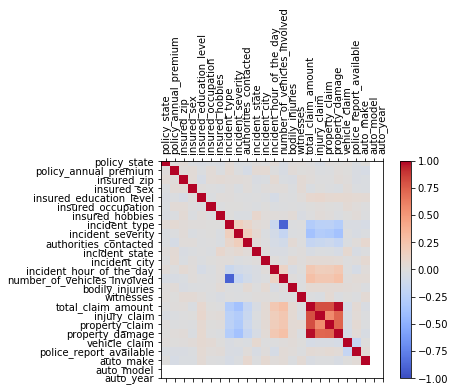

In [3]:
ne=LabelEncoder()
age=df['age']
policy_state=ne.fit_transform(df['policy_state'])
policy_annual_premium=df['policy_annual_premium']
insured_zip=df['insured_zip']
#print(insured_zip.shape())
insured_sex=ne.fit_transform(df['insured_sex'])
insured_education_level=ne.fit_transform(df['insured_education_level'])
insured_occupation=ne.fit_transform(df['insured_occupation'])
insured_hobbies=ne.fit_transform(df['insured_hobbies'])
incident_type=ne.fit_transform(df['incident_type'])
incident_severity=ne.fit_transform(df['incident_severity'])
authorities_contacted=ne.fit_transform(df['authorities_contacted'])
#print(len(authorities_contacted))
incident_state=ne.fit_transform(df['incident_state'])
#print(len(incident_state))
incident_city=ne.fit_transform(df['incident_city'])

#print(len(incident_city))
incident_hour_of_the_day=df['incident_hour_of_the_day']
len(incident_hour_of_the_day)
number_of_vehicles_involved=df['number_of_vehicles_involved']
property_damage=np.array(pr_df).flatten()
bodily_injuries=df['bodily_injuries']
witnesses=df['witnesses']
police_report_available=np.array(po_df).flatten()
total_claim_amount=df['total_claim_amount']
injury_claim=df['injury_claim']
property_claim=df['property_claim']
vehicle_claim=df['vehicle_claim']
auto_make=ne.fit_transform(df['auto_make'])
auto_model=ne.fit_transform(df['auto_model'])
auto_year=df['auto_year']
#ne=LabelEncoder()
#f=ne.fit_transform(df['collision_type'])

d={}
d={'policy_state':policy_state,'policy_annual_premium':policy_annual_premium,'insured_zip':insured_zip,'insured_sex':insured_sex,
  'insured_education_level':insured_education_level,'insured_occupation':insured_occupation,'insured_hobbies':insured_hobbies,
  'incident_type':incident_type,'incident_severity':incident_severity,'authorities_contacted':authorities_contacted,
  'incident_state':incident_state,'incident_city':incident_city,'incident_hour_of_the_day':incident_hour_of_the_day,
  'number_of_vehicles_involved':number_of_vehicles_involved,'bodily_injuries':bodily_injuries,'witnesses':witnesses,'total_claim_amount':total_claim_amount,'injury_claim':injury_claim,
  'property_claim':property_claim,'property_damage':property_damage,'vehicle_claim':vehicle_claim,'police_report_available':police_report_available,'auto_make':auto_make,'auto_model':auto_model,'auto_year':auto_year}
data =pd.DataFrame(d)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

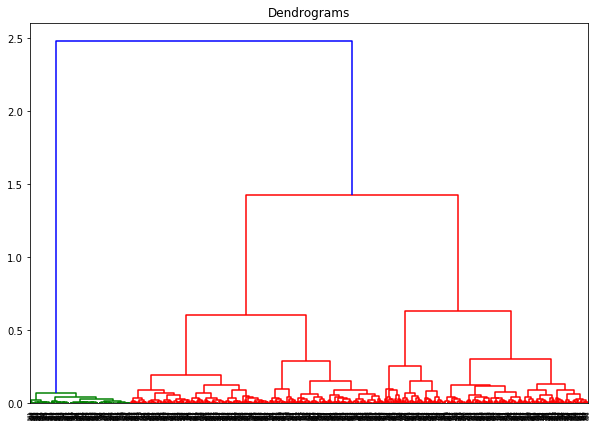

In [8]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))